# Анализ товарного ассортимента магазина

## Описание проекта

### Аналитическая задача

Провести анализ товарного ассортимента и определить какие товары входят в основной и дополнительный ассортимент.

### Описание данных
|Признак | Комментарий|
|--:|:--|
|`date` | дата заказа|
|`customer_id` | идентификатор покупателя|
|`order_id` | идентификатор заказа|
|`product` | наименование товара|
|`quantity` | количество товара в заказе|
|`price` | цена товара|

Последовательность выполнения работ:

Шаг 1. Загрузка данных
- Загрузка данных и предварительный анализ

Шаг 2. Подготовка данных (при необходимости)
- Корректировка заголовков;
- Корректировка типов признаков;
- Поиск дублей, аномальных и пропущенных значений;
- Добавление новых столбцов.

Шаг 3. Исследовательский анализ данных
- Построить диаграмму количества покупок по дням;
- Построить диаграмму, отображающую сумму покупок по дням;
- Построить гистограмму, отображающую распределение заказов по сумме.

Шаг 4. Анализ товарного ассортимента магазина на основе наименования товара и данных из открытых внешних источников
- Разделение товаров на 5-10 категорий;
- Классификация товаров на основной и дополнительный ассортимент.

Шаг 5. Статистические гипотезы
- Сформулировать и проверить статистические гипотезы о равенстве средних чеков для выделенных категорий товаров.


In [1]:
# подключение библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp

import itertools

Шаг 1. Загрузка данных
- Загрузка данных и предварительный анализ

In [2]:
df = pd.read_csv('/content/project_retail.csv')

In [3]:
df.head(2)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0


Шаг 2. Подготовка данных
- Корректировка заголовков;
- Корректировка типов признаков;
- Поиск дублей, аномальных и пропущенных значений;
- Добавление новых столбцов.

In [4]:
# В предсталенном дата сете пропущенные значения отсутствуют
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [5]:
# Убираем лишние пробелы в столбце 'product'
df['product'] = df['product'].str.strip()

In [6]:
df

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [7]:
# Приведем тип данных столбца 'date' к типу datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df.head(3)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0


In [8]:
# Проверка наличия дублей
df.duplicated().sum()

0

In [9]:
# Поиск дублей без столбца 'customer_id'
df.drop(columns = ['customer_id']).duplicated().sum()

1

In [10]:
# Удаление дублей
duplicates = df.drop(columns=['customer_id']).duplicated()
df = df[~duplicates]

In [11]:
# Просмотр результата удаления дублей
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6736 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6736 non-null   datetime64[ns]
 1   customer_id  6736 non-null   object        
 2   order_id     6736 non-null   int64         
 3   product      6736 non-null   object        
 4   quantity     6736 non-null   int64         
 5   price        6736 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 368.4+ KB


In [12]:
# Просмотр описательных статистик числовых данных
df.describe()

,order_id,quantity,price
count,6736.000000,6736.000000,6736.000000
mean,43124.725950,2.501781,462.069329
std,27899.332989,15.267601,871.354301
min,12624.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000
50%,68503.000000,1.000000,135.000000
75%,70503.250000,1.000000,399.500000
max,73164.000000,1000.000000,14917.000000


In [13]:
# Поиск аномалий по количеству позиций в каждом заказе
df.groupby('order_id').agg(count_order_id = ('order_id', 'count')).\
reset_index().\
sort_values(by = 'count_order_id', ascending = False)

,order_id,count_order_id
221,14833,888
222,14835,203
164,14753,90
266,14897,63
1658,70960,60
...,...,...
1210,70128,1
1209,70126,1
1208,70125,1
1207,70123,1


In [ ]:
# Выделяем отдельный столбец с датой без времени
df['date_only'] = df['date'].dt.date
# Выделяем отдельный столбец с годом
df['year'] = df['date'].dt.year
# Выделяем отдельный столбец с месяцем
df['month'] = df['date'].dt.month
# Выделяем отдельный столбец с днем
df['day'] = df['date'].dt.day

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6736 entries, 0 to 6736
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6736 non-null   datetime64[ns]
 1   customer_id  6736 non-null   object        
 2   order_id     6736 non-null   int64         
 3   product      6736 non-null   object        
 4   quantity     6736 non-null   int64         
 5   price        6736 non-null   float64       
 6   date_only    6736 non-null   object        
 7   year         6736 non-null   int64         
 8   month        6736 non-null   int64         
 9   day          6736 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 578.9+ KB


In [ ]:
# Перевод данных в столбце 'date_only' в формат datetime
df['date_only'] = pd.to_datetime(df['date_only'])

In [17]:
# Проверяем тип данных столбца 'date_only'
type(df['date_only'].dtype)

numpy.dtype[datetime64]

In [18]:
# Проверка аномалий в признаке 'date_only'
print("""
Дата начала периода {}.
Дата окончания периода {}.
""".format(df['date'].min(),
           df['date'].max()
           )
)


Дата начала периода 2018-10-01 00:00:00.
Дата окончания периода 2019-10-31 16:00:00.



**Вывод:** ошибок в датах нет, рассматриваемый период 1 год 1 месяц

In [19]:
# Проверяем наличие разных дат в одном заказе
df.groupby('order_id')['date'].nunique().\
reset_index(name='count_unique_dates').\
sort_values(by='count_unique_dates', ascending=False)

,order_id,count_unique_dates
221,14833,74
1658,70960,60
727,69162,23
1754,71148,16
933,69531,12
...,...,...
965,69608,1
966,69611,1
967,69612,1
969,69614,1


In [20]:
# Просмотр данных заказа 14833
df[df['order_id'] == 14833]

,date,customer_id,order_id,product,quantity,price,date_only,year,month,day
4157,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,2019-05-31,2019,5,31
4158,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,2019-05-31,2019,5,31
4159,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0,2019-05-31,2019,5,31
4160,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0,2019-05-31,2019,5,31
4161,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0,2019-05-31,2019,5,31
...,...,...,...,...,...,...,...,...,...,...
5540,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0,2019-06-22,2019,6,22
5541,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,2019-06-22,2019,6,22
5542,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0,2019-06-22,2019,6,22
5543,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0,2019-06-22,2019,6,22


In [21]:
# Просмотр количества позиций в заказе 14833
filtered_df = df[df['order_id'] == 14833]
filtered_df['product'].value_counts()

Рассада Кабачка сорт Аэронавт, кассета по 6шт                           74
Рассада Кабачка сорт Белогор кассета 6 шт E6                            74
Рассада Кабачка сорт Горный, кассета по 6шт                             74
Рассада Кабачка сорт Зебра кассета 6 шт E6                              74
Рассада Кабачка сорт Золотинка кассета 6 шт E6                          74
Рассада Кабачка сорт Сосновский, кассета по 6шт                         74
Рассада Огурец Кристина ячейки по 6 шт Е6                               74
Рассада Огурец Фараон ячейки по 6 шт Е6                                 74
Рассада Огурца сорт Каролина кассета 6 шт E6                            74
Рассада Патиссона сорт Диск, кассета по 6шт                             74
Рассада Патиссона сорт НЛО Белый, кассета по 6шт                        74
Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    74
Name: product, dtype: int64

**Вывод:** вполне вероятно, что это ошибочные данные,
заказ относится к разным датам, возможно это данные корзины,
записи являются дублями

In [22]:
# Сортировка по столбцам 'order_id' и 'date_only' в убывающем порядке
df = df.sort_values(by=['order_id', 'date_only'], ascending=[True, False]).copy()

# Создание столбца с максимальной датой для каждого заказа
df['max_date'] = df.groupby('order_id')['date_only'].transform('max')

# Оставляем записи с датой, равной максимальной дате
df = df[df['date_only'] == df['max_date']].copy()

# Удаление временного столбца
df.drop('max_date', axis=1, inplace=True)

In [23]:
# Контрольная проверка наличия нескольких дат в одном заказе
df.groupby('order_id')['date_only'].nunique().\
reset_index(name='count_unique_dates').\
sort_values(by='count_unique_dates', ascending=False)

,order_id,count_unique_dates
0,12624,1
1859,71347,1
1851,71330,1
1852,71331,1
1853,71333,1
...,...,...
929,69524,1
930,69525,1
931,69527,1
932,69528,1


In [24]:
# Проверяем наличие разных покупателей в одном заказе
df.groupby('order_id')['customer_id'].nunique().\
reset_index(name='count_unique_customers').\
sort_values(by='count_unique_customers', ascending=False)

,order_id,count_unique_customers
1799,71226,2
797,69283,2
1581,70808,2
0,12624,1
1859,71347,1
...,...,...
930,69525,1
931,69527,1
932,69528,1
933,69531,1


In [25]:
# Просмотр данных с несколькими покупателями в одном заказе
df[df['order_id'].isin([71226, 69283, 70808])]

,date,customer_id,order_id,product,quantity,price,date_only,year,month,day
1154,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,2018-12-10,2018,12,10
1160,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,2018-12-10,2018,12,10
2409,2019-03-20 15:00:00,78e8c0e7-4888-4a75-8137-a90f02a6cb8c,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727.0,2019-03-20,2019,3,20
2410,2019-03-20 16:00:00,ad1630b2-fc36-4961-900a-46612ff6c655,70808,Тележка багажная DELTA ТБР-20 черный с серым г...,1,727.0,2019-03-20,2019,3,20
2996,2019-04-21 15:00:00,c912fec9-fd4f-41b7-bb04-4548740b276b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569.0,2019-04-21,2019,4,21
2998,2019-04-21 19:00:00,fd4af93f-9fbd-449f-91f8-b42b830e265b,71226,Сушилка для белья напольная НИКА СБ3Б 10 м белая,1,569.0,2019-04-21,2019,4,21


In [26]:
# Оставляем последние по хронологии записи
df = df[~df.index.isin([1154, 2409, 2996])]

In [27]:
# Контрольная проверка наличия разных покупателей в одном заказе
df.groupby('order_id')['customer_id'].nunique().\
reset_index(name='count_unique_customers').\
sort_values(by='count_unique_customers', ascending=False)

,order_id,count_unique_customers
0,12624,1
1859,71347,1
1851,71330,1
1852,71331,1
1853,71333,1
...,...,...
929,69524,1
930,69525,1
931,69527,1
932,69528,1


In [28]:
# Просмотр результата после удаления аномалий в заказах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5017 entries, 4340 to 6735
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5017 non-null   datetime64[ns]
 1   customer_id  5017 non-null   object        
 2   order_id     5017 non-null   int64         
 3   product      5017 non-null   object        
 4   quantity     5017 non-null   int64         
 5   price        5017 non-null   float64       
 6   date_only    5017 non-null   datetime64[ns]
 7   year         5017 non-null   int64         
 8   month        5017 non-null   int64         
 9   day          5017 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 431.1+ KB


In [29]:
# Просмотр описательных статистик для непрерывных признаков
percentiles = [0.01, 0.05, 0.95, 0.99]
df[['price', 'quantity']].describe(percentiles = percentiles)

,price,quantity
count,5017.000000,5017.000000
mean,513.995814,2.798485
std,942.095628,17.356815
min,9.000000,1.000000
1%,15.000000,1.000000
5%,30.000000,1.000000
50%,150.000000,1.000000
95%,2234.000000,8.000000
99%,4949.000000,30.000000
max,14917.000000,1000.000000


In [30]:
# Функция для подсчета нижного и верхнего усов для признака
def calc_boxplot(df_col:pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col) <= hival, np.asarray(df_col))
    wisklo = np.compress(np.asarray(df_col) >= loval, np.asarray(df_col))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [31]:
# Расчет статистик для признака "Количество товара в заказе"
lower_whisker, upper_whisker = calc_boxplot(df['quantity'])
mode = df['quantity'].mode().values[0]
median = df['quantity'].median()
per_1 = np.percentile(df['quantity'].dropna(), 1)
per_5 = np.percentile(df['quantity'].dropna(), 5)
per_95 = np.percentile(df['quantity'].dropna(), 95)
per_99 = np.percentile(df['quantity'].dropna(), 99)

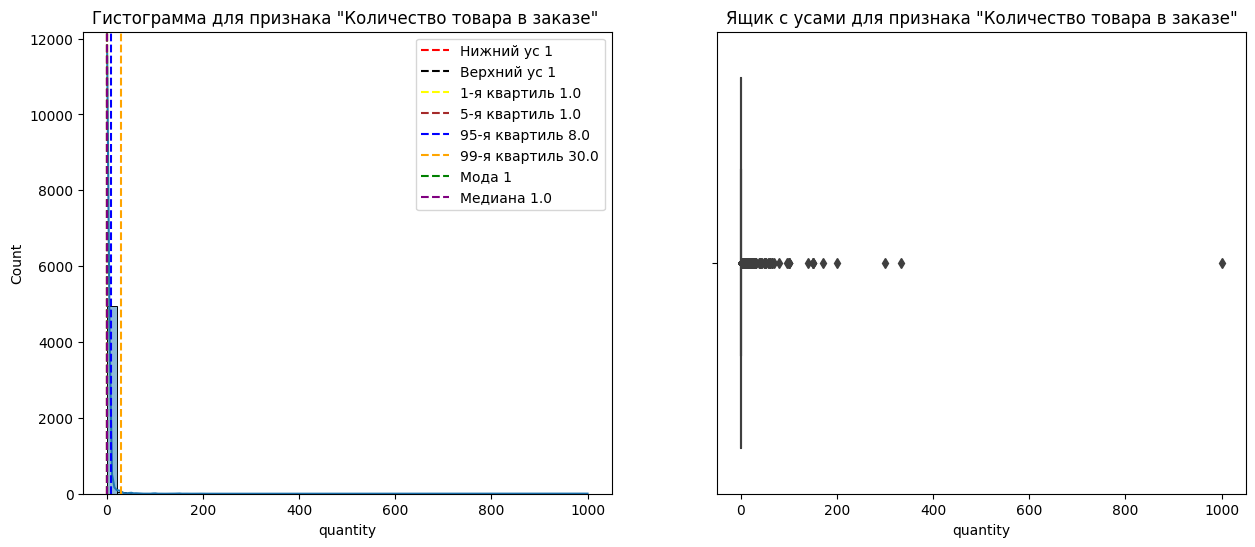

In [32]:
# Создание графика
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 6))

# Гистограмма
sns.histplot(data=df, x='quantity', kde=True, bins=50, ax=ax[0])
ax[0].set_title('Гистограмма для признака "Количество товара в заказе" ')

# Добавление нижнего уса
ax[0].axvline(lower_whisker, color='red', linestyle='--', label='Нижний ус {}'.format(np.round(lower_whisker,2)))

# Добавление верхнего уса
ax[0].axvline(upper_whisker, color='black', linestyle='--', label='Верхний ус {}'.format(np.round(upper_whisker,2)))

#  Добавление 1-ой квартили
ax[0].axvline(per_1, color='yellow', linestyle='--', label='1-я квартиль {}'.format(np.round(per_1,2)))

#  Добавление 5-ой квартили
ax[0].axvline(per_5, color='brown', linestyle='--', label='5-я квартиль {}'.format(np.round(per_5,2)))

#  Добавление 95-ой квартили
ax[0].axvline(per_95, color='blue', linestyle='--', label='95-я квартиль {}'.format(np.round(per_95,2)))

#  Добавление 99-ой квартили
ax[0].axvline(per_99, color='orange', linestyle='--', label='99-я квартиль {}'.format(np.round(per_99,2)))

# Добавление моды
ax[0].axvline(mode, color='green', linestyle='--', label='Мода {}'.format(np.round(mode,2)))

# Добавление медианы
ax[0].axvline(median, color='purple', linestyle='--', label='Медиана {}'.format(np.round(median,2)))

# Отображение легенды в верхнем правом углу
ax[0].legend(loc='upper right')

# Ящик с усами
sns.boxplot(data=df, x='quantity', ax=ax[1])
ax[1].set_title('Ящик с усами для признака "Количество товара в заказе"')

plt.show()

In [33]:
# Подсчет количества записей, значение которых превышает 95-й квартиль
df[df['quantity'] > per_95].shape[0]

240

In [34]:
# Расчет потерь
anomalies = 240
total = 5017
loss = (anomalies / total) * 100
print("При удалении {} аномалий в количестве товаров из общего числа {} наблюдений произойдет потеря около {:.2f}% данных.".format(anomalies, total, loss))

При удалении 240 аномалий в количестве товаров из общего числа 5017 наблюдений произойдет потеря около 4.78% данных.


In [35]:
# Удаление аномальных значений по признаку "Количество товара в заказе"
df = df.drop(df[df['quantity'] > per_95].index)

In [36]:
# Просмотр результата удаления
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4777 entries, 4340 to 6735
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4777 non-null   datetime64[ns]
 1   customer_id  4777 non-null   object        
 2   order_id     4777 non-null   int64         
 3   product      4777 non-null   object        
 4   quantity     4777 non-null   int64         
 5   price        4777 non-null   float64       
 6   date_only    4777 non-null   datetime64[ns]
 7   year         4777 non-null   int64         
 8   month        4777 non-null   int64         
 9   day          4777 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 410.5+ KB


In [37]:
# Расчет статистик для признака "Цена товара"
lower_whisker, upper_whisker = calc_boxplot(df['price'])
mode = df['price'].mode().values[0]
median = df['price'].median()
per_1 = np.percentile(df['price'].dropna(), 1)
per_5 = np.percentile(df['price'].dropna(), 5)
per_95 = np.percentile(df['price'].dropna(), 95)
per_99 = np.percentile(df['price'].dropna(), 99)

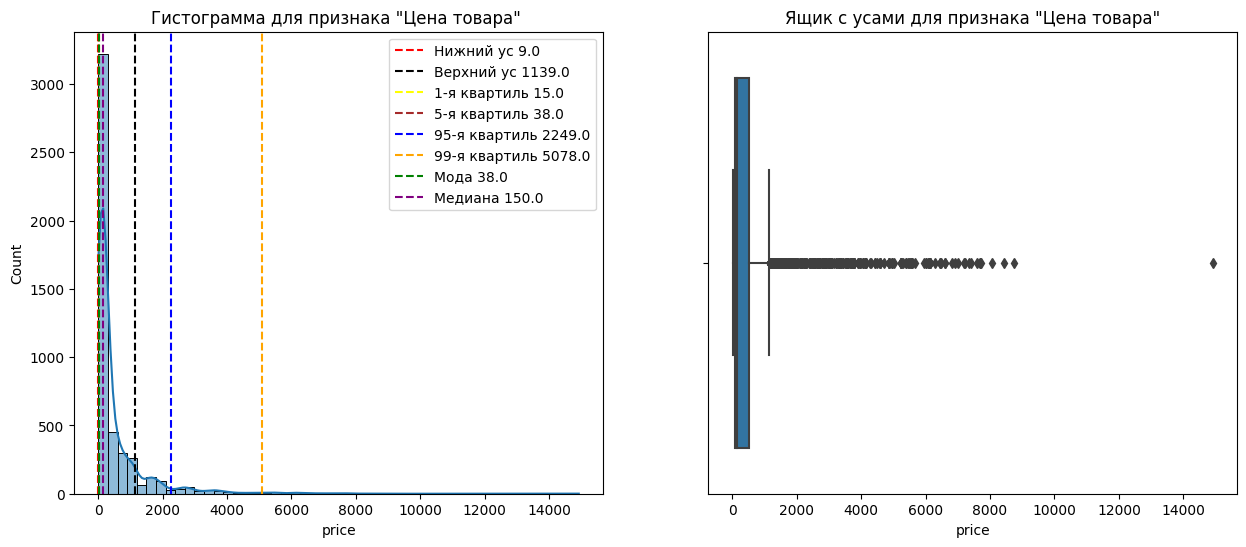

In [38]:
#Aномалии для признака "Цена товара"

# Создание графика
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 6))

# Гистограмма
sns.histplot(data=df, x='price', kde=True, bins=50, ax=ax[0])
ax[0].set_title('Гистограмма для признака "Цена товара" ')

# Добавление нижнего уса
ax[0].axvline(lower_whisker, color='red', linestyle='--', label='Нижний ус {}'.format(np.round(lower_whisker,2)))

# Добавление верхнего уса
ax[0].axvline(upper_whisker, color='black', linestyle='--', label='Верхний ус {}'.format(np.round(upper_whisker,2)))

#  Добавление 1-ой квартили
ax[0].axvline(per_1, color='yellow', linestyle='--', label='1-я квартиль {}'.format(np.round(per_1,2)))

#  Добавление 5-ой квартили
ax[0].axvline(per_5, color='brown', linestyle='--', label='5-я квартиль {}'.format(np.round(per_5,2)))

#  Добавление 95-ой квартили
ax[0].axvline(per_95, color='blue', linestyle='--', label='95-я квартиль {}'.format(np.round(per_95,2)))

#  Добавление 99-ой квартили
ax[0].axvline(per_99, color='orange', linestyle='--', label='99-я квартиль {}'.format(np.round(per_99,2)))

# Добавление моды
ax[0].axvline(mode, color='green', linestyle='--', label='Мода {}'.format(np.round(mode,2)))

# Добавление медианы
ax[0].axvline(median, color='purple', linestyle='--', label='Медиана {}'.format(np.round(median,2)))

# Отображение легенды в верхнем правом углу
ax[0].legend(loc='upper right')

# Ящик с усами
sns.boxplot(data=df, x='price', ax=ax[1])
ax[1].set_title('Ящик с усами для признака "Цена товара"')

plt.show()

In [39]:
# Подсчет количества записей, значение которых превышает 95-й квартиль
df[df['price'] > per_95].shape[0]

238

In [40]:
# Расчет совокупных потерь по двум признакам
anomalies = 240+238
total = 5017
loss = (anomalies / total) * 100
print("При удалении {} аномалий в количестве товаров из общего числа {} наблюдений произойдет потеря около {:.2f}% данных.".format(anomalies, total, loss))

При удалении 478 аномалий в количестве товаров из общего числа 5017 наблюдений произойдет потеря около 9.53% данных.


In [41]:
# Удаление аномальных значений по признаку "Цена товара"
df = df.drop(df[df['price'] > per_95].index)

In [42]:
# Контрольный просмотр описательных сатитистик для двух признаков
df[['price', 'quantity']].describe(percentiles = percentiles)

,price,quantity
count,4539.000000,4539.000000
mean,356.834325,1.380921
std,458.291991,1.031072
min,9.000000,1.000000
1%,15.000000,1.000000
5%,38.000000,1.000000
50%,149.000000,1.000000
95%,1574.000000,4.000000
99%,1949.000000,6.000000
max,2249.000000,8.000000


In [43]:
# Добавление столбца с суммой заказа
df['order_total'] = df.quantity * df.price
df.head(2)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,day,order_total
4340,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 25-50 см",1,150.0,2019-06-02,2019,6,2,150.0
4341,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 50-100 см",1,225.0,2019-06-02,2019,6,2,225.0


Шаг 3. Исследовательский анализ данных
- Построить диаграмму количества покупок по дням;
- Построить диаграмму, отображающую сумму покупок по дням;
- Построить гистограмму, отображающую распределение заказов по сумме.

In [44]:
# Расчет количества уникальных заказов по дням
daily_count = df.groupby('date_only')['order_id'].nunique().reset_index(name='daily_order_count')
daily_count

,date_only,daily_order_count
0,2018-10-01,7
1,2018-10-02,10
2,2018-10-03,6
3,2018-10-04,9
4,2018-10-05,6
...,...,...
387,2019-10-27,2
388,2019-10-28,7
389,2019-10-29,3
390,2019-10-30,10


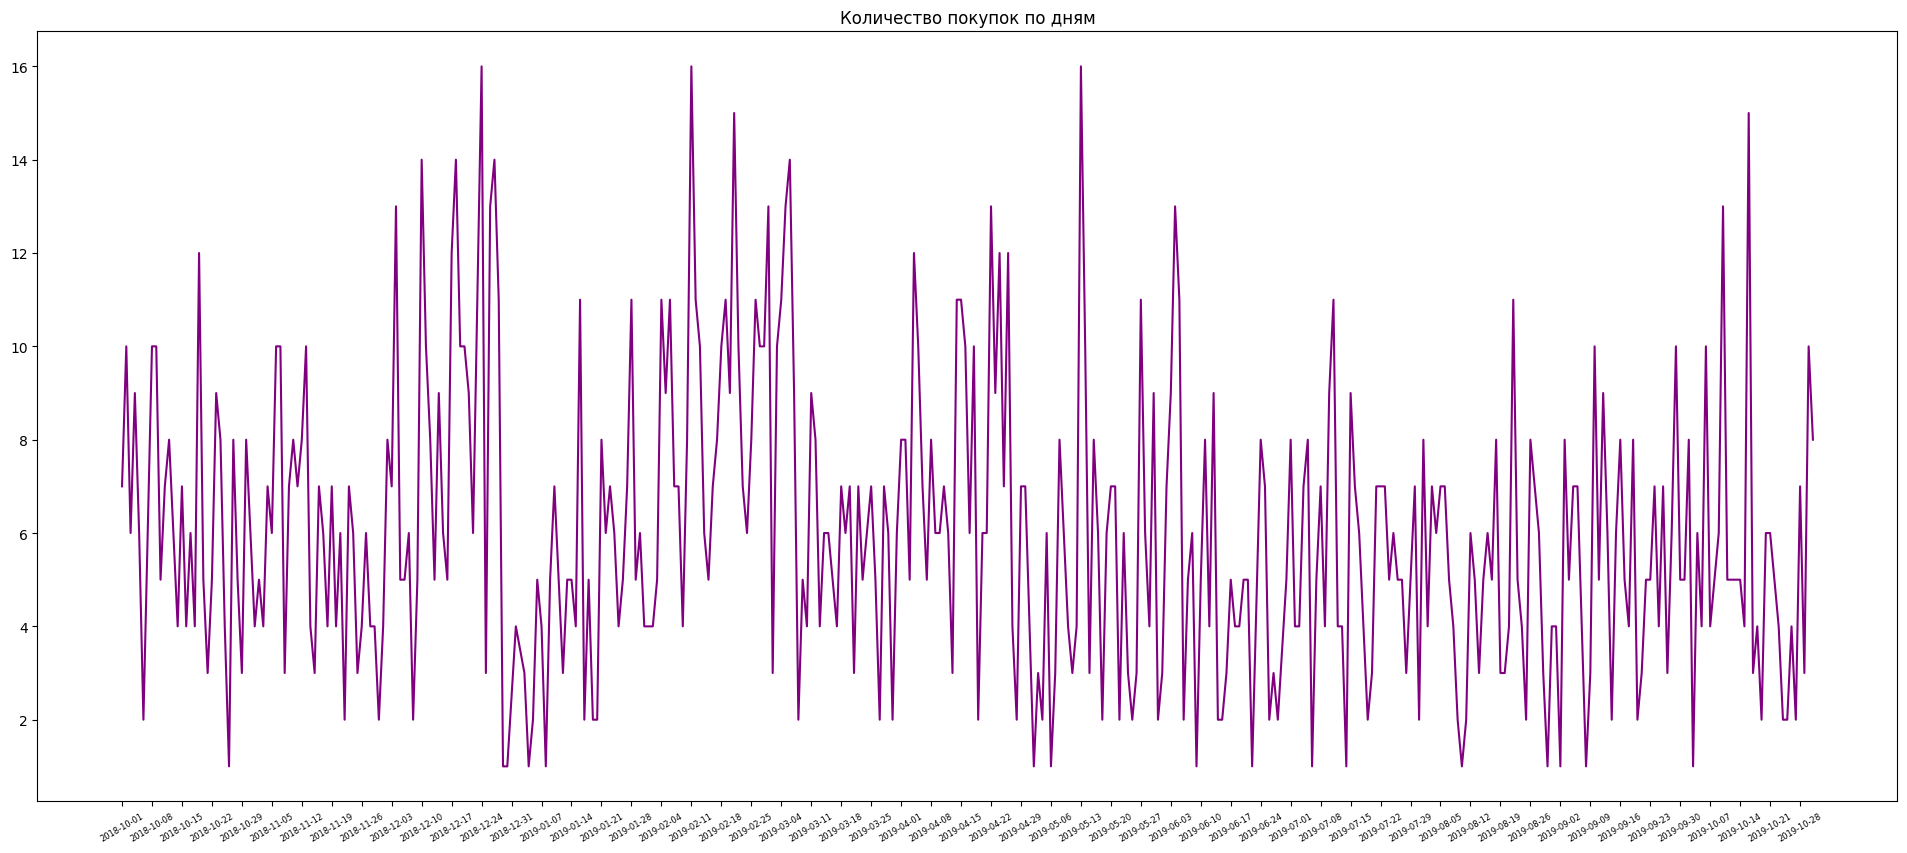

In [45]:
#  Построение линейного графика
fig, ax = plt.subplots(figsize=(24, 10))

sns.lineplot(data=daily_count.reset_index(), x='date_only', y='daily_order_count', color='purple')

date_ticks = pd.date_range(daily_count['date_only'].min(), daily_count['date_only'].max(), freq='7D')
plt.xticks(date_ticks, rotation=30, fontsize=6)

plt.xlabel('')
plt.ylabel('')
plt.title('Количество покупок по дням')

plt.show()


In [46]:
# Вычисление скользящего среднего для количества уникальных заказов по дням
rolling_mean = daily_count['daily_order_count'].rolling(window=7).mean()

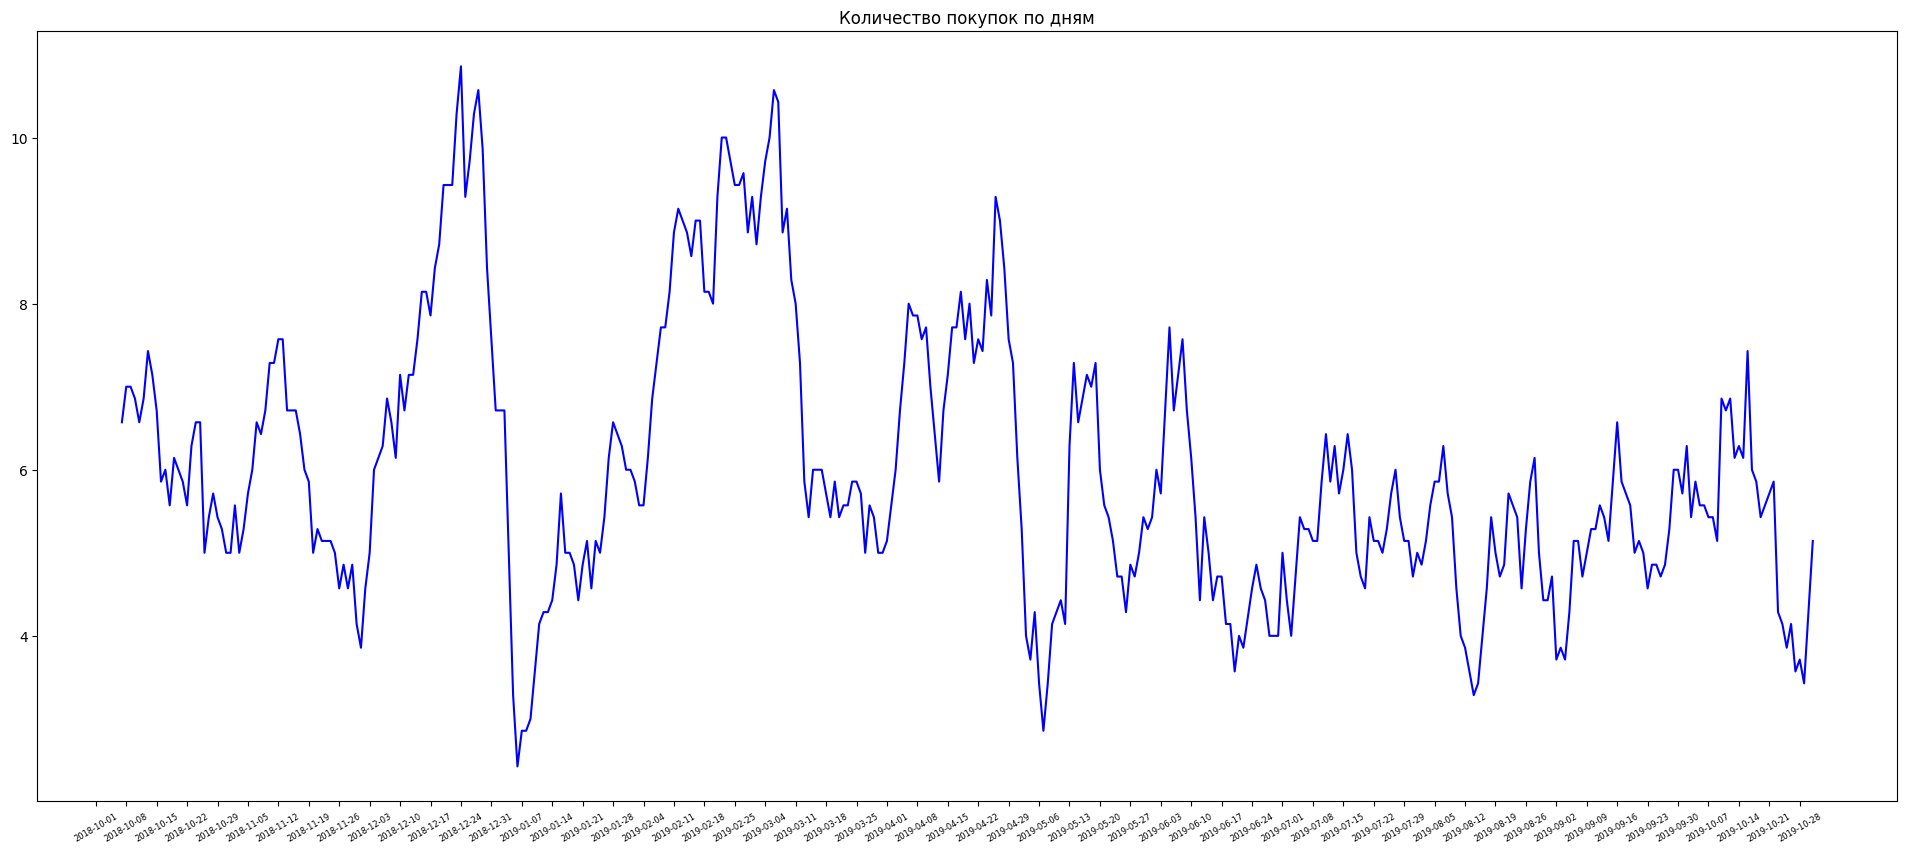

In [47]:
# Построение линейного графика для скользящего среднего
fig, ax = plt.subplots(figsize=(24, 10))

sns.lineplot(data=daily_count.reset_index(), x='date_only', y=rolling_mean, color='blue')

date_ticks = pd.date_range(daily_count['date_only'].min(), daily_count['date_only'].max(), freq='7D')
plt.xticks(date_ticks, rotation=30, fontsize=6)

plt.xlabel('')
plt.ylabel('')
plt.title('Количество покупок по дням')

plt.show()

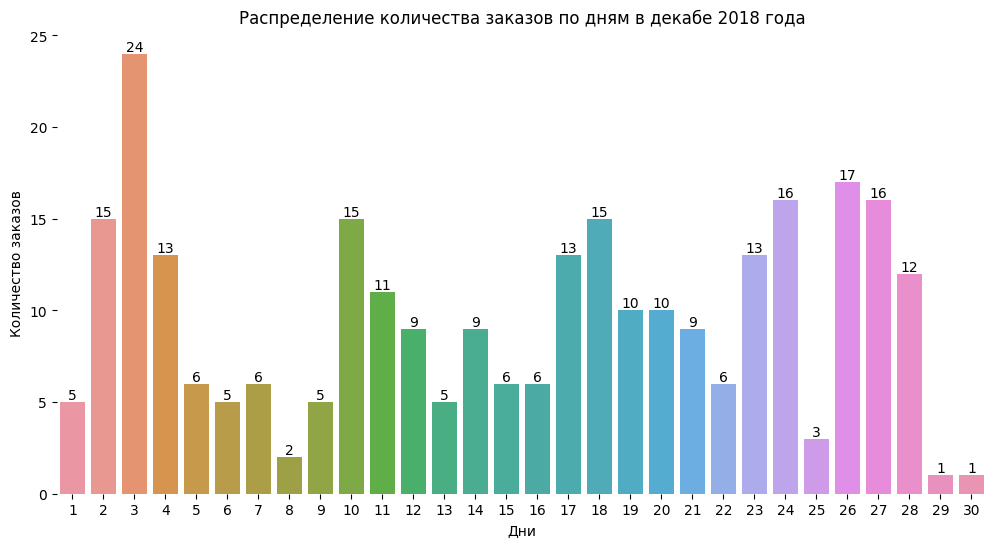

In [92]:
# Гистограмма для количества покупок по дням (декабрь 2018)
december_2018_data = df[(df['year'] == 2018) & (df['month'] == 12)]
daily_purchases = december_2018_data.groupby('day')['order_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=daily_purchases, x='day', y='order_id')
ax.bar_label(ax.containers[0])
plt.title('Распределение количества заказов по дням в декабе 2018 года')
plt.ylabel('Количество заказов')
plt.xlabel('Дни')
plt.box(False)
plt.show()

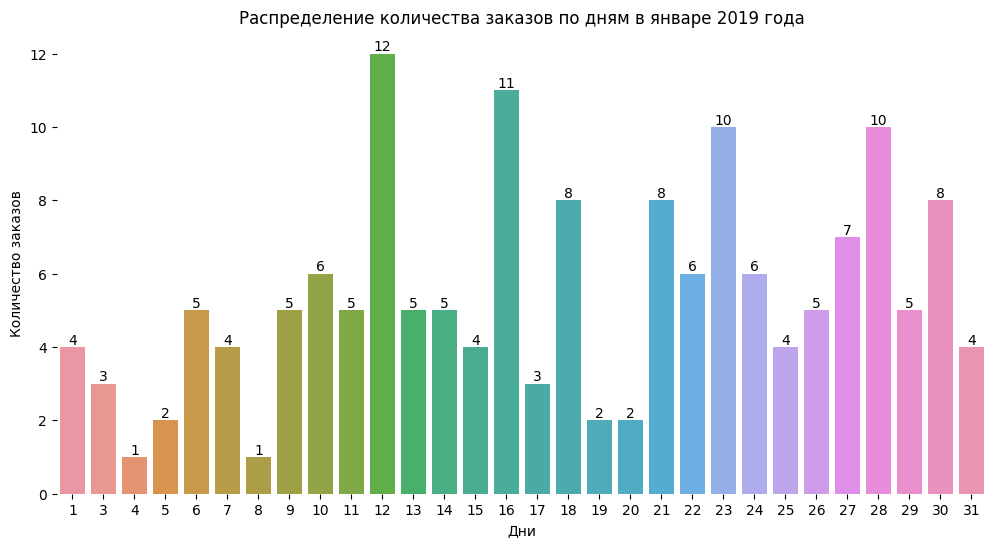

In [89]:
# Гистограмма для количества покупок по дням (январь 2019)
january_2019_data = df[(df['year'] == 2019) & (df['month'] == 1)]
daily_purchases = january_2019_data.groupby('day')['order_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=daily_purchases, x='day', y='order_id')
ax.bar_label(ax.containers[0])
plt.title('Распределение количества заказов по дням в январе 2019 года')
plt.ylabel('Количество заказов')
plt.xlabel('Дни')
plt.box(False)
plt.show()

In [49]:
# Расчет суммарной выручки по дням
daily_total = df.groupby('date_only')['order_total'].sum().reset_index(name='daily_order_total')
daily_total

,date_only,daily_order_total
0,2018-10-01,3793.0
1,2018-10-02,6951.0
2,2018-10-03,6415.0
3,2018-10-04,16981.0
4,2018-10-05,4036.0
...,...,...
387,2019-10-27,550.0
388,2019-10-28,4672.0
389,2019-10-29,642.0
390,2019-10-30,6325.0


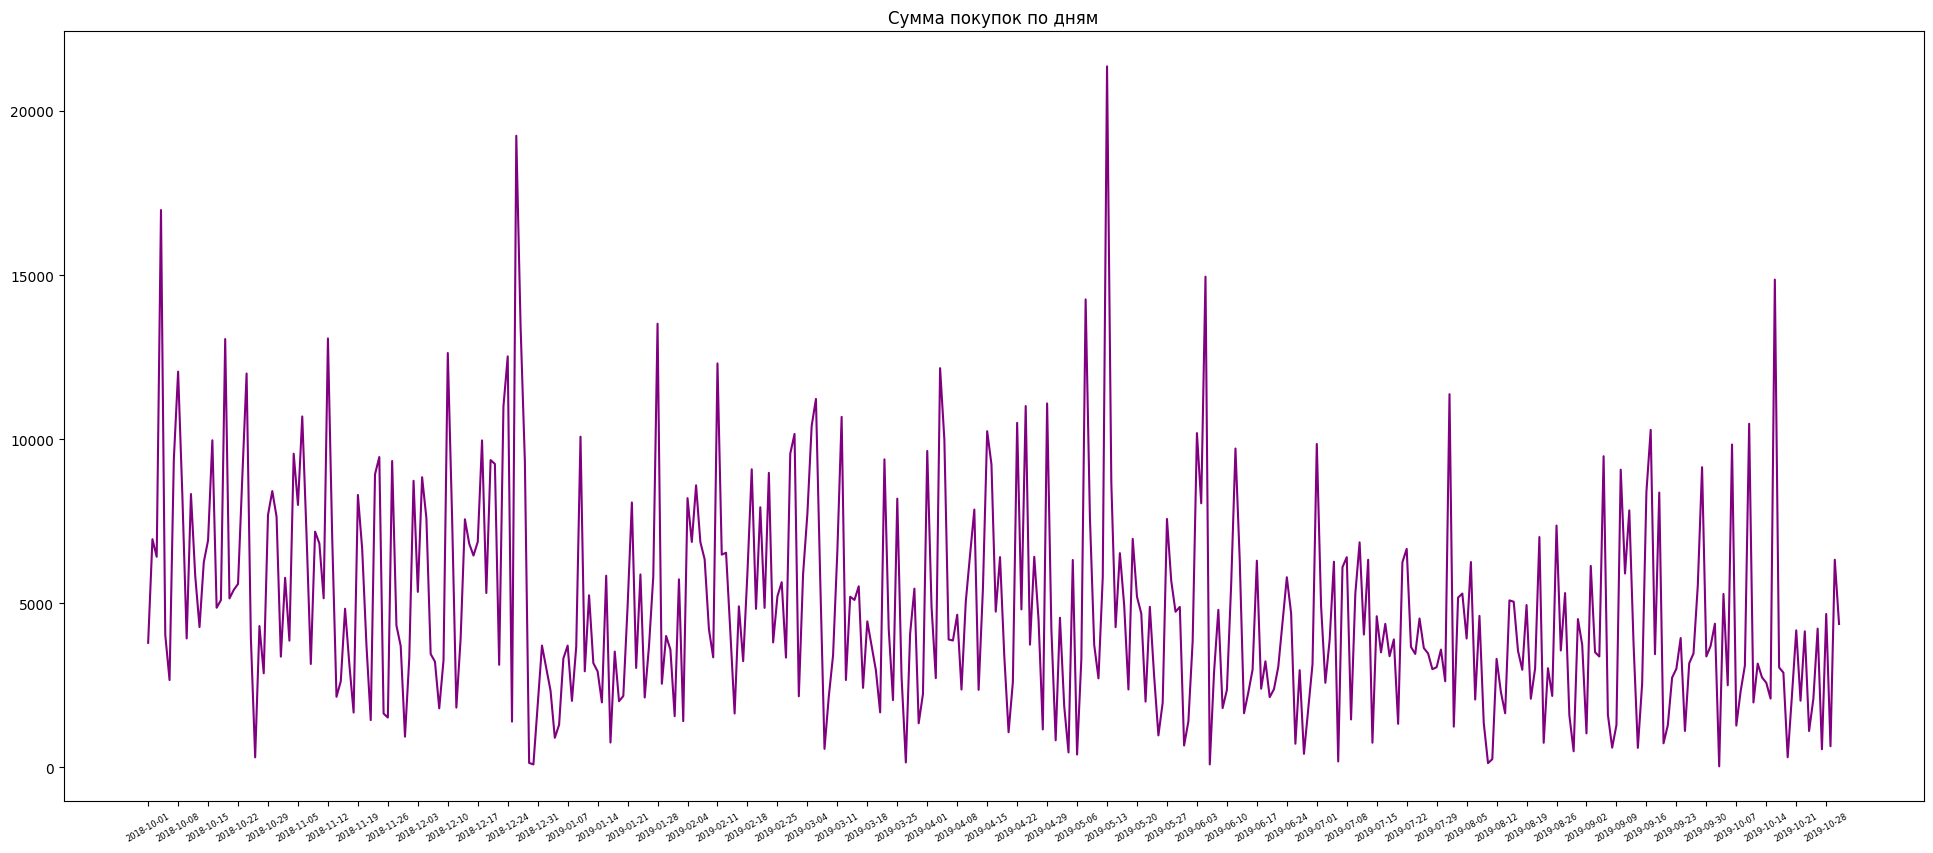

In [50]:
#  Построение линейного графика
fig, ax = plt.subplots(figsize=(24, 10))

sns.lineplot(data=daily_total.reset_index(), x='date_only', y='daily_order_total', color='purple')

date_ticks = pd.date_range(daily_total['date_only'].min(), daily_total['date_only'].max(), freq='7D')
plt.xticks(date_ticks, rotation=30, fontsize=6)

plt.xlabel('')
plt.ylabel('')
plt.title('Сумма покупок по дням')

plt.show()

In [51]:
# Вычисление скользящего среднего для суммарной выручки по дням
rolling_mean = daily_total['daily_order_total'].rolling(window=7).mean()

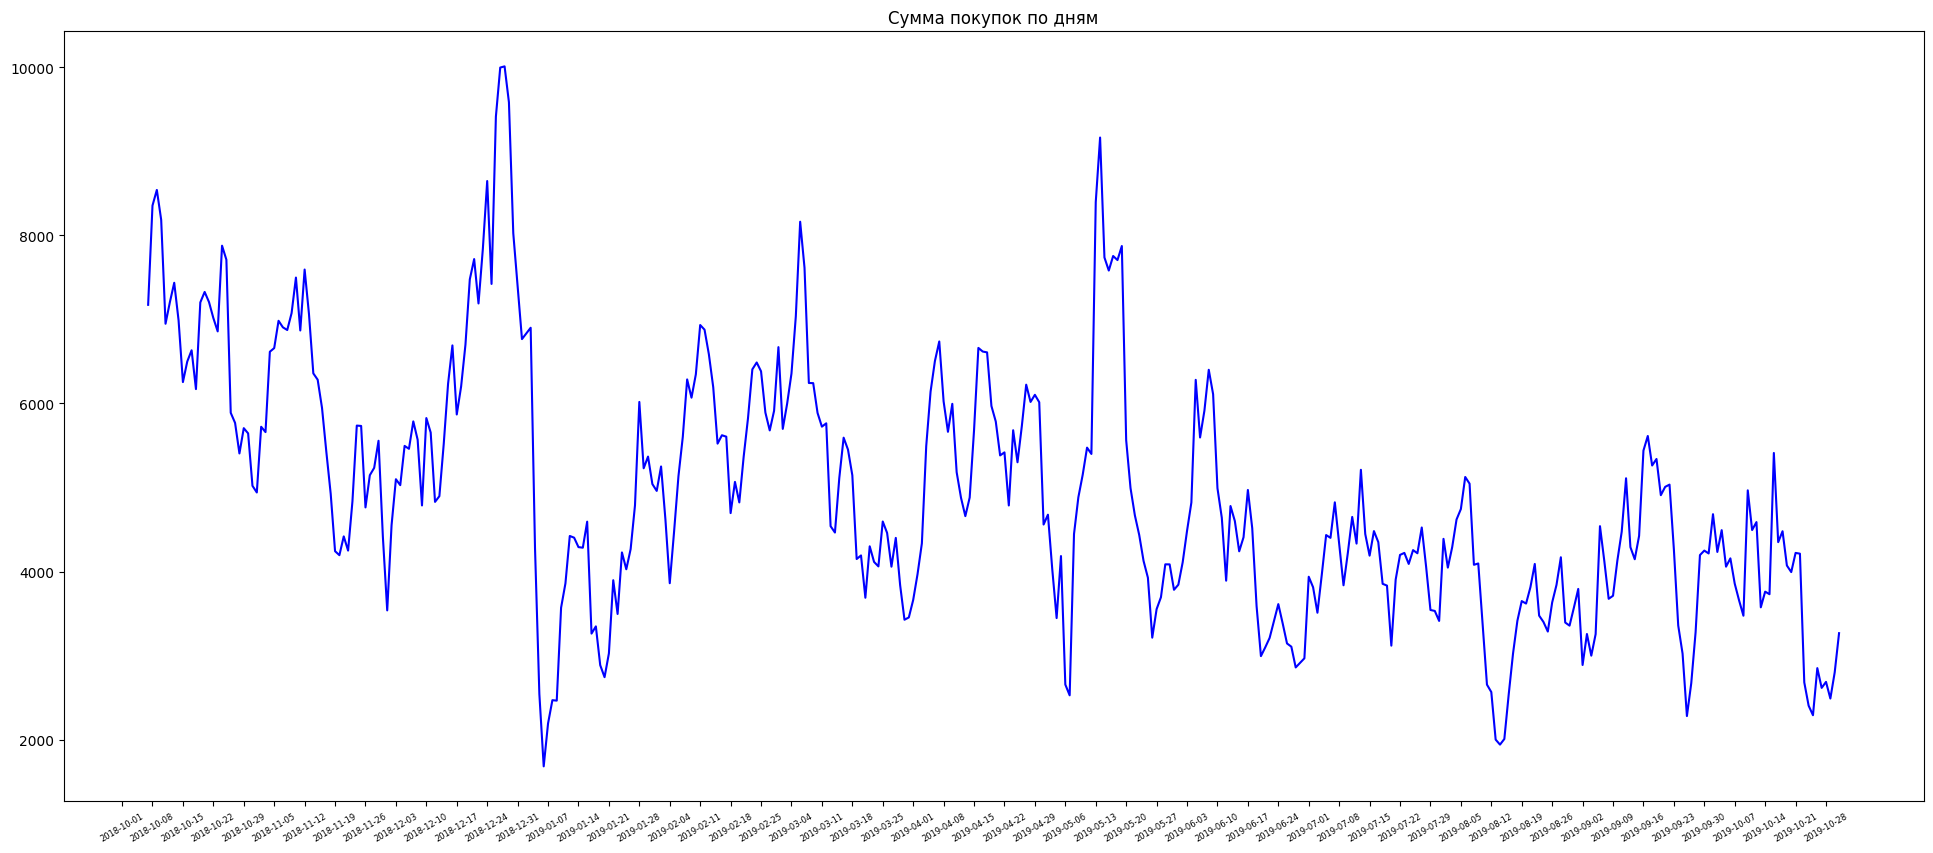

In [52]:
# Построение линейного графика для скользящего среднего
fig, ax = plt.subplots(figsize=(24, 10))

sns.lineplot(data=daily_total.reset_index(), x='date_only', y=rolling_mean, color='blue')

date_ticks = pd.date_range(daily_total['date_only'].min(), daily_total['date_only'].max(), freq='7D')
plt.xticks(date_ticks, rotation=30, fontsize=6)

plt.xlabel('')
plt.ylabel('')
plt.title('Сумма покупок по дням')

# Отображение графика
plt.show()

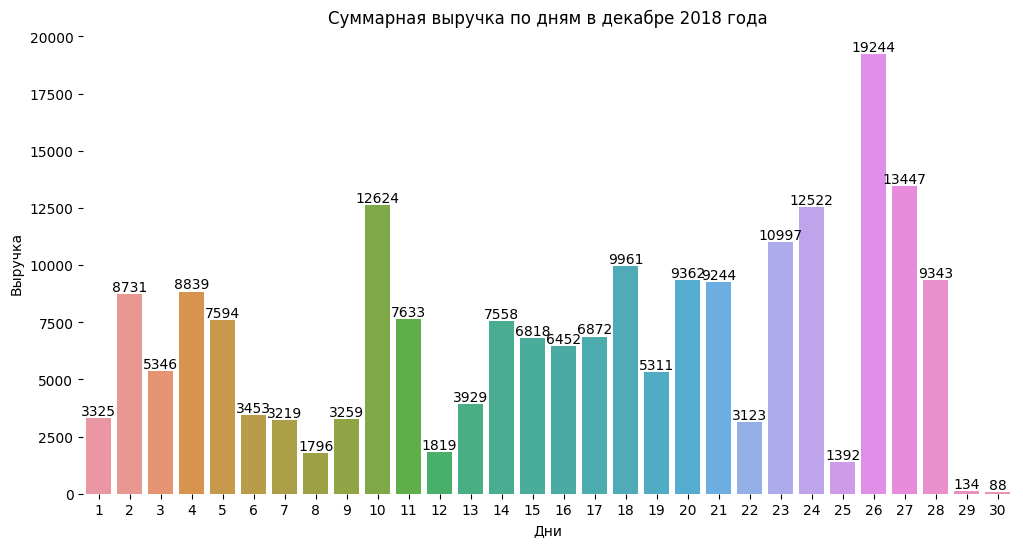

In [95]:
# Гистограмма для суммарной выручки по дням (декабрь 2018)
december_2018_data = df[(df['year'] == 2018) & (df['month'] == 12)]
daily_revenue_december_2018 = december_2018_data.groupby('day')['order_total'].sum().reset_index(name='daily_revenue')

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=daily_revenue_december_2018, x='day', y='daily_revenue')
ax.bar_label(ax.containers[0])
plt.title('Суммарная выручка по дням в декабре 2018 года')
plt.ylabel('Выручка')
plt.xlabel('Дни')
plt.box(False)
plt.show()

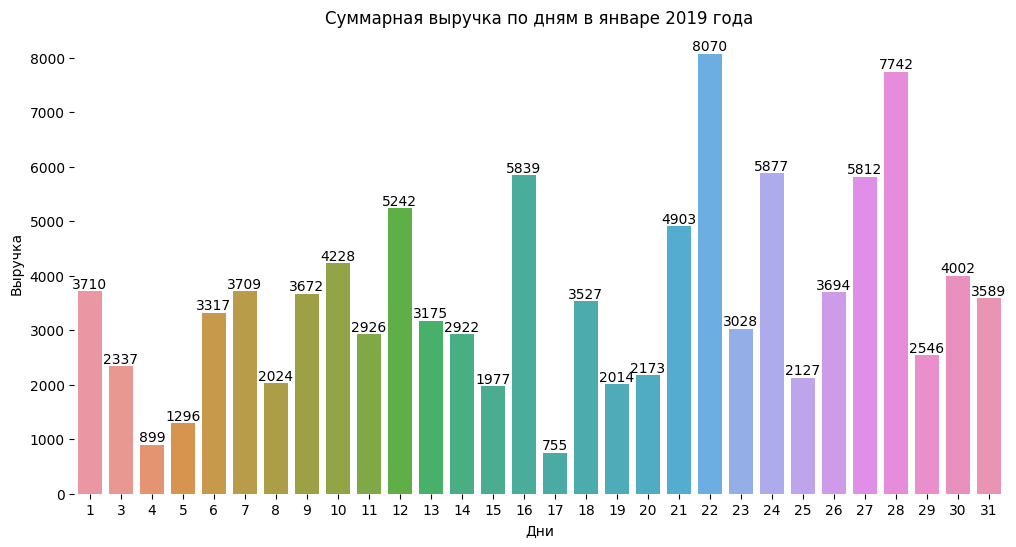

In [94]:
# Гистограмма для суммарной выручки по дням (январь 2019)
january_2019_data = df[(df['year'] == 2019) & (df['month'] == 1)]
daily_revenue_january_2019 = january_2019_data.groupby('day')['order_total'].sum().reset_index(name='daily_revenue')

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=daily_revenue_january_2019, x='day', y='daily_revenue')
ax.bar_label(ax.containers[0])
plt.title('Суммарная выручка по дням в январе 2019 года')
plt.ylabel('Выручка')
plt.xlabel('Дни')
plt.box(False)
plt.show()

In [54]:
# Расчет общего чека для каждого заказа
order_total_sum = df.groupby('order_id')['order_total'].sum().reset_index(name='order_total_sum').sort_values(by='order_total_sum', ascending=False)
order_total_sum.head(10)

,order_id,order_total_sum
149,14735,10656.0
1715,71685,8832.0
1913,72162,8810.0
2142,72674,7496.0
459,68760,6447.0
562,68971,5996.0
912,69766,5847.0
1415,70939,5847.0
1005,70009,5775.0
189,14795,5556.0


In [55]:
# Поиск аномалий для признака "Общий чек для каждого заказа"
percentiles = [0.01, 0.05, 0.95, 0.99]
order_total_sum.describe(percentiles = percentiles)

,order_id,order_total_sum
count,2365.000000,2365.000000
mean,63671.659619,819.564482
std,18678.746544,866.336394
min,12624.000000,14.000000
1%,14512.640000,38.000000
5%,14673.200000,74.000000
50%,70396.000000,596.000000
95%,72898.400000,2174.000000
99%,73113.080000,4411.040000
max,73164.000000,10656.000000


In [56]:
# Расчет статистик для признака "Общий чек для каждого заказа"
lower_whisker, upper_whisker = calc_boxplot(order_total_sum['order_total_sum'])
mode = order_total_sum['order_total_sum'].mode()[0]
median = order_total_sum['order_total_sum'].median()
per_1 = np.percentile(order_total_sum['order_total_sum'].dropna(), 1)
per_5 = np.percentile(order_total_sum['order_total_sum'].dropna(), 5)
per_95 = np.percentile(order_total_sum['order_total_sum'].dropna(), 95)
per_99 = np.percentile(order_total_sum['order_total_sum'].dropna(), 99)

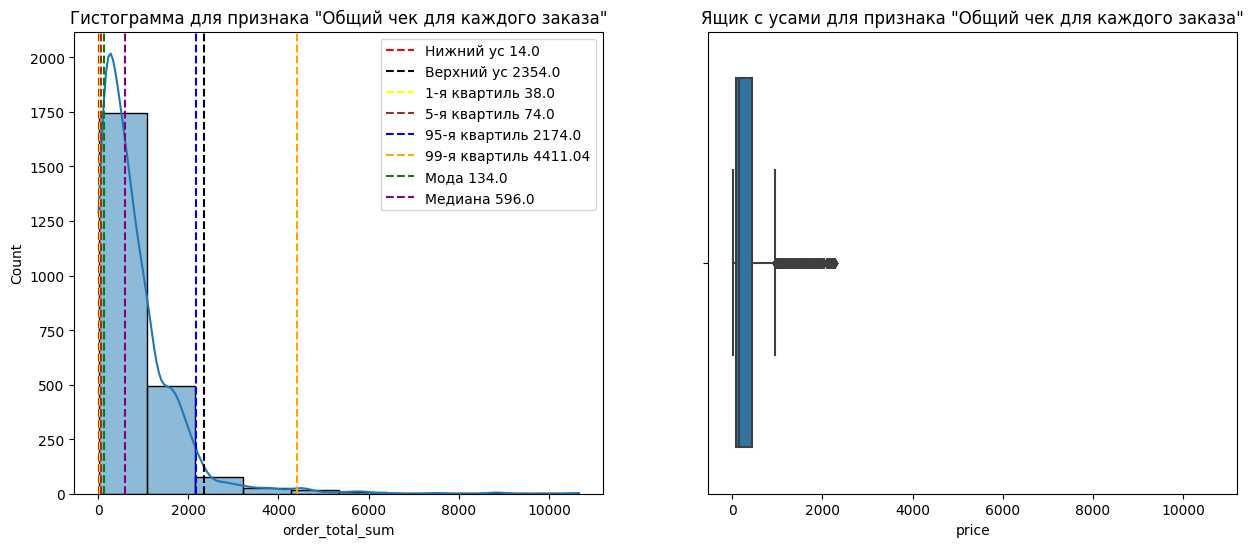

In [57]:
#Aномалии для признака "Общий чек для каждого заказа"

# Создание графика
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 6))

# Гистограмма
sns.histplot(data=order_total_sum, x='order_total_sum', kde=True, bins=10, ax=ax[0])
ax[0].set_title('Гистограмма для признака "Общий чек для каждого заказа"')

# Добавление нижнего уса
ax[0].axvline(lower_whisker, color='red', linestyle='--', label='Нижний ус {}'.format(np.round(lower_whisker,2)))

# Добавление верхнего уса
ax[0].axvline(upper_whisker, color='black', linestyle='--', label='Верхний ус {}'.format(np.round(upper_whisker,2)))

#  Добавление 1-ой квартили
ax[0].axvline(per_1, color='yellow', linestyle='--', label='1-я квартиль {}'.format(np.round(per_1,2)))

#  Добавление 5-ой квартили
ax[0].axvline(per_5, color='brown', linestyle='--', label='5-я квартиль {}'.format(np.round(per_5,2)))

#  Добавление 95-ой квартили
ax[0].axvline(per_95, color='blue', linestyle='--', label='95-я квартиль {}'.format(np.round(per_95,2)))

#  Добавление 99-ой квартили
ax[0].axvline(per_99, color='orange', linestyle='--', label='99-я квартиль {}'.format(np.round(per_99,2)))

# Добавление моды
ax[0].axvline(mode, color='green', linestyle='--', label='Мода {}'.format(np.round(mode,2)))

# Добавление медианы
ax[0].axvline(median, color='purple', linestyle='--', label='Медиана {}'.format(np.round(median,2)))

# Отображение легенды в верхнем правом углу
ax[0].legend(loc='upper right')

# Ящик с усами
sns.boxplot(data=df, x='price', ax=ax[1])
ax[1].set_title('Ящик с усами для признака "Общий чек для каждого заказа"')

plt.show()

In [58]:
# Отбор номеров заказов с аномальными значениями признака "Общий чек для каждого заказа", которые превышают 95-й квартиль
anomalous_orders = order_total_sum[order_total_sum['order_total_sum'] > per_99]['order_id'].tolist()

In [59]:
# Удаление наиболее дорогих заказов из основного датафрейма
df = df[~df['order_id'].isin(anomalous_orders)]
order_total_sum = df.groupby('order_id')['order_total'].sum().reset_index(name='order_total_sum').sort_values(by='order_total_sum', ascending=False)

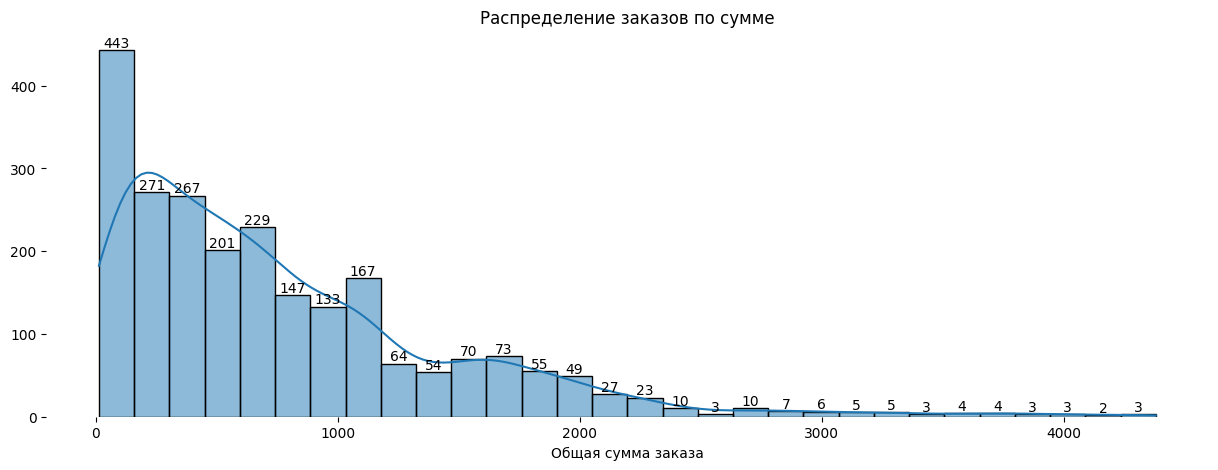

In [60]:
# Постороение итоговой гистограммы по признаку "Общий чек для каждого заказа"
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(order_total_sum['order_total_sum'], bins=30, kde = True)
ax.bar_label(ax.containers[1])
plt.title('Распределение заказов по сумме')
plt.ylabel('')
plt.xlabel('Общая сумма заказа', fontsize = 10)
plt.box(False)
plt.show()

Шаг 4. Анализ товарного ассортимента магазина на основе наименования товара и данных из открытых внешних источников

- Разделение товаров на 5-10 категорий;

- Классификация товаров на основной и дополнительный ассортимент.

In [61]:
# Исправление орфографических ошибок
df['product'] = df['product'].str.replace('Ё', 'E').str.replace('ё', 'е').str.replace('Искуственных', 'Искусственных')

In [62]:
# Функция для присваивания категории на основе словаря
def categorise(row, keyword_dict):
    for category, keyword_list in keyword_dict.items():
        if any(keyword in row['product'] for keyword in keyword_list):
            return category
    return 'нет категории'

In [63]:
# Словарь с категориями
keyword_dict = {
'Дача и сад': ['Агератум', 'Адиантум', 'Азалия', 'Аквилегия', 'Алиссум',
    'Алоэ Вера', 'Альбука', 'Амариллис', 'Анемона', 'Антуриум',
    'Аптения', 'Арбуз', 'Аргирантерум', 'Артемизия', 'Аспарагус', 'Астра',
    'Афеляндра', 'Бадан', 'Базилик', 'Баклажан', 'Бакопа', 'Бальзамин',
    'Барвинок', 'Бархатцы', 'Бегония', 'Буддлея', 'Бузульник', 'Валериана',
    'Вербейник', 'Вербена', 'Вероника', 'Вигна', 'Виноград', 'Виола', 'Газания',
    'Гайлардия', 'Гардения', 'Гвоздика', 'Гелихризум', 'Георгина', 'Герань',
    'Гербера', 'Гиацинт', 'Гимнокалициум', 'Гиностемма', 'Гипсофила',
    'Глоксиния', 'Годеция', 'Горох', 'Гортензия', 'Девичий виноград',
    'Декабрист', 'Дендробиум', 'Джункус', 'Диффенбахия', 'Дихондра',
    'Драцена', 'Душица', 'Дыня', 'Ель', 'Замиокулькас',
    'Зверобой', 'Земляника', 'Змееголовник', 'Импатиенс', 'Иссоп', 'Кабачок',
    'Каланхое', 'Калатея', 'Календула', 'Калибрахо', 'Калла', 'Каллуна',
    'Калоцефалус Брауни', 'Камнеломка', 'Кампанула', 'Капсикум', 'Капуста',
    'Кипарисовик', 'Клен', 'Клубника', 'Кодонанта', 'Колеус', 'Колокольчик',
    'Комнатное растение', 'Кореопсис', 'Кореопсис', 'Кориандр', 'Космея',
    'Котовник', 'Кофе Арабика', 'Крассула', 'Крокус', 'Лаванда', 'Лаватера',
    'Лавр', 'Лантана', 'Лапчатка', 'Левкой', 'Лемонграсс', 'Лен', 'Лиана',
    'Лилейник', 'Литопс', 'Лобелия', 'Лук порей', 'Львиный зев', 'Любисток',
    'Маттиола', 'Мединилла', 'Мелисса', 'Мимоза', 'Мирт', 'Молодило', 'Монарда',
    'Морковь', 'Муррайя', 'Мускари', 'Мята', 'Нарцисс', 'Настурция',
    'Незабудка', 'Нефролепис', 'Нивянник (Ромашка)', 'Нолина', 'Овсянница',
    'Огурец', 'Осина', 'Остеоспермум', 'Папоротник', 'Пастернак', 'Патиссон',
    'Пахира', 'Пеларгония', 'Пеперомия', 'Петрушка', 'Петуния', 'Пион',
    'Пиретрум', 'Платикодон', 'Плектрантус', 'Плющ', 'Подсолнечник', 'Полынь',
    'Портулак', 'Примула', 'Пряные травы', 'Пуансет', 'Радермахер', 'Ранункулус',
    'Рассада', 'Роза', 'Розмарин', 'Рудбекия', 'Рукола', 'Сальвия', 'Сантолина',
    'Седум', 'Сельдерей', 'Синнингия', 'Скиммия', 'Смолевка', 'Соланум',
    'Солидаго', 'Спатифиллум', 'Суккулент', 'Сциндапсус', 'Табак', 'Тагетис',
    'Тимьян', 'Томат', 'томата (помидор)', 'Традесканция', 'Тыква', 'Тюльпан',
    'Укроп', 'Фаленопсис', 'Фатсия', 'Фиалка', 'Физостегия', 'Фикус', 'Фиттония',
    'Флокс', 'Фуксия', 'Хамедорея', 'Хлорофитум', 'Хлорофитум', 'Хоста',
    'Хризантема', 'Хризантема', 'Хризолидокарпус', 'Целозия', 'Цикламен',
    'Цимбопогон', 'Цинерания','Цинерария', 'Циния', 'Цинния', 'Циперус Зумула',
    'Цитрофортунелла Кумкват', 'Чабер', 'Шалфей', 'Шеффлера', 'Шпинат',
    'Эвкалипт', 'Энотера', 'Эпипремнум Ауреум', 'Эхеверия', 'Эхинацея',
    'Эхинокактус', 'Эшшольция', 'Юкка', 'Ясколка', 'Гoршок', 'Поддон', 'Семена'],
'Бытовая химия (доп. ассортимент)': ['Антижир', 'Антинакипин',
    'Ароматизированное средство', 'Гель для стирки',
    'Гипоаллергенный концентрированный гель', 'для мытья', 'Жидкое мыло',
    'Зубная паста', 'Кондиционер для белья', 'Маска', 'Мыло', 'Мыло-скраб',
    'Отбеливатель', 'Паста для полировки', 'Паста зубная', 'Пена', 'Порошок',
    'Средство для удаления', 'Средство против засоров', 'Стиральный биопорошок',
    'Универсальное средство на основе хлора', 'Чистящий крем',
    'для посудомоечных машин', 'Увлажняющая маска'],
'Бытовая техника (доп. ассортимент)': ['Автоматическая щетка', 'Весы',
    'Кипятильник электрический', 'Мантоварка-пароварка',
    'Миксер', 'Пылесос', 'Соковарка', 'Соковыжималка', 'Утюг', 'Фен',
    'Чайник', 'Электроштопор'],
'Хозяйственные товары': ['Бак', 'Ванна 70 л', 'Ведро', 'Веник', 'Вешалк',
    'Гладильная доска', 'Держатель', 'Дозатор для мыла', 'Доска гладильная',
    'Карниз', 'Корзина', 'Короб', 'Корыто', 'Лестница', 'Мусорный контейнер',
    'Мыльница', 'Набор вешалок', 'Настенная сушилка',
    'Настольная гладильная доска', 'Окномойка', 'Плечики', 'Подголовник',
    'Подрукавник', 'Сиденье', 'Сменный блок для ролика', 'Сметка с совком',
    'Совок', 'Стремянка', 'Сумка хозяйственная на колесах', 'Сумка-тележка',
    'Сушилка МУЛЬТИ', 'Сушилка для белья', 'Таз', 'Тележка', 'Термометр',
    'Урна', 'Швабра', 'Щетка', 'Ящик', 'Eрш', 'Бельевые прищепки',
    'Вантуз', 'Губка', 'для гладильной доски', 'Ерш для унитаза',
    'Запасная насадка для ерша', 'Кольца для штор', 'Кофр', 'Ложка обувная',
    'Мешок для деликатной стирки', 'Набор прищепок', 'Насадка',
    'Отжим для ведра', 'Перчатки', 'Подкладка под чехол', 'Прищепки для белья',
    'Пробка', 'Пьезозажигалка с мультиискрой', 'Рассекатель пламени',
    'Ролик для чистки', 'Сетка', 'Сменная насадка к швабре',
    'Сумка для тележки', 'Ткань', 'Тряпка', 'Тряпкодержатель'],
'Кухонные принадлежности': ['Бидон', 'Блюд', 'Бульонница', 'Вилка',
    'Доска разделочная', 'Кастрюля', 'Ковш', 'Контейнер',
    'Котел', 'Кружка', 'Кувшин', 'Ложка',  'Лоток', 'Мантоварка алюминиевая',
    'Масленка', 'Мини-сковорода', 'Миска', 'Набор бокалов', 'Набор для пикника',
    'Набор кружек', 'Набор ножей', 'Набор посуды', 'Набор стаканов',
    'Набор столовых приборо', 'Набор форм', 'Набор фужеров', 'Tepмокружка AVEX',
    'Набор эмалированных салатников', 'Нож', 'Овощеварка', 'Противень',
    'Разделочная доска', 'Салатник', 'Сахарница', 'Сковорода', 'Сотейник',
    'Стакан', 'Столов', 'Тарелка', 'Термокружка', 'Термос', 'Термостакан',
    'Тортница', 'Фарфоровая кружка', 'Форма', 'Фужер', 'Хлебница', 'Чайн',
    'Банка', 'Венчик', 'Вкладыши для хранения посуды', 'для сковороды',
    'Емкость', 'Картофелемялка', 'Защитный экран подставка',
    'Измельчитель овощей', 'Жестяная банка', 'Кисточка', 'Крышка',
    'Кухонные ножницы', 'Лопатка', 'Мерный стакан', 'Модульная стеклянная банка',
    'Ножеточка', 'Овощечистка', 'Орехоколка', 'Отделитель косточек',
    'Подставка для ножей', 'Пресс для чеснока', 'Просеиватель', 'Рыбочистка',
    'Сито', 'Скалка', 'Скребок', 'Терка', 'Толкушка', 'Шприц кондитерский'],
'Предметы для дома': ['Ваза', 'Готовая скатерть',
    'Двуспальное постельное белье', 'Ковер', 'Коврик', 'Комплект махровых',
    'Комплект постельного белья', 'Кухонное полотенце', 'Махровое полотенце',
    'Махровый халат', 'Набор ковров для ванной комнаты',
    'Набор кухонных полотенец', 'Набор махровых салфеток', 'Наволочка',
    'Наматрасник', 'Наматрицник-чехол', 'Одеяло', 'Плед', 'Пододеяльник',
    'Подушка', 'Покрывало', 'Полотенце', 'Простын', 'Салфетница',
    'Светильник настольный', 'Сервировочная салфетка',
    'Скатерть', 'Халат', 'Штанга для ванной', 'Штора', 'Декоративная композиция',
    'Искусствен', 'Ключница Картина', 'Корзинка', 'коробка', 'Крючок одежный',
    'Муляж', 'Подушка декоративная', 'Салфетка', 'Сервировочная салфетка',
    'Стяжки для чехла', 'Фоторамка', 'Цветок искусственный', 'Чехол'],
'Мебель (доп. ассортимент)' : ['Комод', 'Обувница', 'Подставка', 'Полк',
    'Складной детский пуф', 'Стеллаж', 'Этажерка'],
'Строительство и ремонт (доп. ассортимент)': ['Бензин для зажигалок', 'Веревка',
    'Завертка форточная', 'Крепеж', 'Крючок', 'Линейка',
    'Мешок для строительного мусора', 'Многофункциональный инструмент',
    'Набор прецизионных напильников', 'Набор сверел', 'Основание для пробки',
    'Петля',  'Пружина', 'Решетка вентиляционная', 'Ручка мебельная',
    'Ручка-скоба', 'Сверло', 'Сверло-фреза', 'Стяжка оконная', 'угольник',
    'Фал', 'Холодная сварка', 'Шило', 'Шнур', 'Шпагат', 'Шпингалет',
    'Штангенциркуль']
 }

In [64]:
# Создание нового столбца 'category' с применением функции categorise
df['category'] = df.apply(categorise, args=(keyword_dict,), axis=1)

In [65]:
# Проверка, есть ли незаполненные категории в столбце 'category'
df[df.category == 'нет категории']

,date,customer_id,order_id,product,quantity,price,date_only,year,month,day,order_total,category


In [66]:
# Просмотр исправленного датафрейма
df.head(2)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,day,order_total,category
4340,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 25-50 см",1,150.0,2019-06-02,2019,6,2,150.0,Дача и сад
4341,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 50-100 см",1,225.0,2019-06-02,2019,6,2,225.0,Дача и сад


In [67]:
df.groupby('category')['order_total'].sum().sort_values()

category
Строительство и ремонт (доп. ассортимент)      7620.0
Бытовая химия (доп. ассортимент)              13988.0
Бытовая техника (доп. ассортимент)            37820.0
Мебель (доп. ассортимент)                     49883.0
Кухонные принадлежности                      151847.0
Предметы для дома                            270962.0
Дача и сад                                   483351.0
Хозяйственные товары                         784852.0
Name: order_total, dtype: float64

In [68]:
df.groupby('category')['order_id'].count().sort_values()

category
Мебель (доп. ассортимент)                      32
Бытовая техника (доп. ассортимент)             38
Бытовая химия (доп. ассортимент)               38
Строительство и ремонт (доп. ассортимент)      38
Кухонные принадлежности                       292
Предметы для дома                             426
Хозяйственные товары                          934
Дача и сад                                   2630
Name: order_id, dtype: int64

Учитывая 2 параметра (**количество заказов** и **сумма прибыли**) разделяем ассортимент на **основной** и **дополнительный** для данного магазина

In [69]:
# Создаем столбец 'main_additional' на основе значений столбца 'category'
df['main_additional'] = np.where('доп. ассортимент' in df['category'], 'дополнительный', 'основной')

In [70]:
# Просмотр результата
df.head(2)

,date,customer_id,order_id,product,quantity,price,date_only,year,month,day,order_total,category,main_additional
4340,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 25-50 см",1,150.0,2019-06-02,2019,6,2,150.0,Дача и сад,основной
4341,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"Осина обыкновенная, Высота 50-100 см",1,225.0,2019-06-02,2019,6,2,225.0,Дача и сад,основной


In [71]:
# Удаление записи (доп. ассортимент) из столбца 'category'
df['category'] = df['category'].str.replace('\(\доп\. ассортимент\)', '', regex=True).str.strip()

In [72]:
# Просмотр корректности удаления записи
df.groupby('category')['order_id'].count().sort_values()

category
Мебель                       32
Бытовая техника              38
Бытовая химия                38
Строительство и ремонт       38
Кухонные принадлежности     292
Предметы для дома           426
Хозяйственные товары        934
Дача и сад                 2630
Name: order_id, dtype: int64

Шаг 5. Статистические гипотезы
- Сформулировать и проверить статистические гипотезы о равенстве средних чеков для выделенных категорий товаров.

In [73]:
# Выборка для расчета среднего чека для категориии 'Мебель'
furniture = df[df['category'] == 'Мебель'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [74]:
# Выборка для расчета среднего чека для категориии 'Бытовая техника'
home_app = df[df['category'] == 'Бытовая техника'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [75]:
# Выборка для расчета среднего чека для категориии 'Строительство и ремонт'
renovation = df[df['category'] == 'Строительство и ремонт'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [76]:
# Выборка для расчета среднего чека для категориии 'Бытовая химия'
chemicals = df[df['category'] == 'Бытовая химия'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [77]:
# Выборка для расчета среднего чека для категориии 'Кухонные принадлежности'
кitchen = df[df['category'] == 'Кухонные принадлежности'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [78]:
# Выборка для расчета среднего чека для категориии 'Предметы для дома'
home_goods = df[df['category'] == 'Предметы для дома'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [79]:
# Выборка для расчета среднего чека для категориии 'Хозяйственные товары'
supplies = df[df['category'] == 'Хозяйственные товары'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [80]:
# Выборка для расчета среднего чека для категориии 'Дача и сад'
garden = df[df['category'] == 'Дача и сад'].\
groupby('order_id')['order_total'].sum().\
reset_index(name='total_sum').\
sort_values(by='total_sum', ascending=False)

In [81]:
# Создаем словь с наименованием выборок
category_selections = {
    'Мебель': furniture,
    'Бытовая техника': home_app,
    'Строительство и ремонт': renovation,
    'Бытовая химия': chemicals,
    'Кухонные принадлежности': кitchen,
    'Предметы для дома': home_goods,
    'Хозяйственные товары': supplies,
    'Дача и сад': garden
}

In [82]:
# Расчет точечных статистик для среднего чека для каждой категории
for category, selection in category_selections.items():
    average_bill = np.round(selection['total_sum'].mean(), 2)
    print(f"Средний чек для категории '{category}': {average_bill}")

Средний чек для категории 'Мебель': 1609.13
Средний чек для категории 'Бытовая техника': 1022.16
Средний чек для категории 'Строительство и ремонт': 245.81
Средний чек для категории 'Бытовая химия': 499.57
Средний чек для категории 'Кухонные принадлежности': 660.2
Средний чек для категории 'Предметы для дома': 787.68
Средний чек для категории 'Хозяйственные товары': 917.96
Средний чек для категории 'Дача и сад': 576.1


In [83]:
 # Установка уровня значимости для всех тестов
alpha = 0.05

Формулируем гипотезы о нормальности распределения данных в выборках
- Нулевая гипотеза **(H0)**: Распределение данных соответствует нормальному распределению.

- Альтернативная гипотеза **(H1)**: Распределение данных отличается от нормального распределения.

In [84]:
# Проверяем каждую выборку на нормальность распределения с помощью теста Колмогорова-Смирнова
for category, selection in category_selections.items():

    # Извлекаем столбец 'total_sum' из каждой выборки
    total_sum = selection['total_sum']

    # Применяем тест
    _, p_value = kstest(total_sum, 'norm')

    # Вывод результатов проверки
    if p_value > alpha:
        print(f"Распределение столбца 'total_sum' в выборке '{category}' является нормальным (p-value = {p_value})")
    else:
        print(f"Распределение столбца 'total_sum' в выборке '{category}' не является нормальным (p-value = {p_value})")

Распределение столбца 'total_sum' в выборке 'Мебель' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Бытовая техника' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Строительство и ремонт' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Бытовая химия' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Кухонные принадлежности' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Предметы для дома' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Хозяйственные товары' не является нормальным (p-value = 0.0)
Распределение столбца 'total_sum' в выборке 'Дача и сад' не является нормальным (p-value = 0.0)


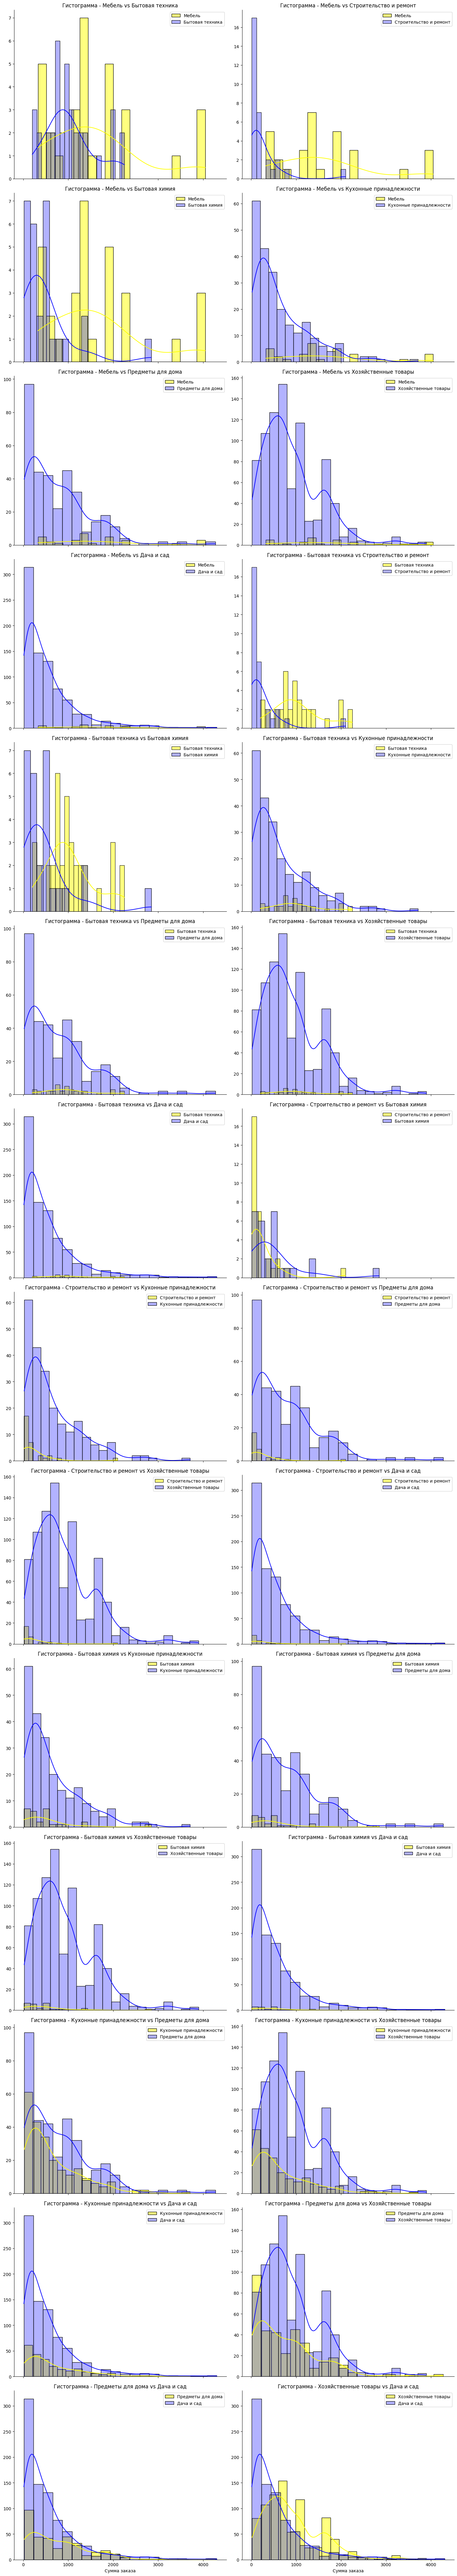

In [85]:
# К каждой паре выборок строим гистограммы и графики плотности
pairs = list(itertools.combinations(category_selections.items(), 2))

num_rows = (len(pairs) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, sharex=True, figsize=(15, 6 * num_rows))

for i, pair in enumerate(pairs):
    category1, selection1 = pair[0]
    category2, selection2 = pair[1]

    # Вычисление индексов текущего подграфика
    row = i // 2
    col = i % 2

    # Получение соответствующих осей для графика
    ax = axes[row, col]

    # Построение гистограммы и графика плотности для первой категории
    sns.histplot(selection1['total_sum'], kde=True, ax=ax, label=category1, bins=20, color='yellow')

    # Построение гистограммы и графика плотности для второй категории
    sns.histplot(selection2['total_sum'], kde=True, ax=ax, label=category2, bins=20, alpha=0.3, color='blue')

    ax.legend()
    sns.despine(ax=ax)
    ax.set_ylabel('')
    ax.set_title(f'Гистограмма - {category1} vs {category2}')
    ax.set_xlabel('Сумма заказа')

# Удаление пустых подграфиков, если количество пар нечетное
if len(pairs) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

Формулируем гипотезы о равестве распределения выборок
- Нулевая гипотеза **(H0)**: Распределения двух выборок равны.

- Альтернативная гипотеза **(H1**): Распределения двух выборок отличаются.

In [86]:
# Применяем тест Колмогорова-Смирнова к каждой паре выборок
for pair in pairs:
    category1, selection1 = pair[0]
    category2, selection2 = pair[1]

    total_sum1 = selection1['total_sum'].values
    total_sum2 = selection2['total_sum'].values

    _, p_value = ks_2samp(total_sum1, total_sum2)

    if p_value > alpha:
        print(f"Распределения в категориях '{category1}' и '{category2}' схожи (p-value = {p_value})")
    else:
        print(f"Распределения в категориях '{category1}' и '{category2}' различны (p-value = {p_value})")

Распределения в категориях 'Мебель' и 'Бытовая техника' различны (p-value = 0.0024738961236049385)
Распределения в категориях 'Мебель' и 'Строительство и ремонт' различны (p-value = 2.1133055111933748e-09)
Распределения в категориях 'Мебель' и 'Бытовая химия' различны (p-value = 3.557580824052334e-06)
Распределения в категориях 'Мебель' и 'Кухонные принадлежности' различны (p-value = 2.3420793418935527e-07)
Распределения в категориях 'Мебель' и 'Предметы для дома' различны (p-value = 5.438094968625514e-07)
Распределения в категориях 'Мебель' и 'Хозяйственные товары' различны (p-value = 1.3098708081276078e-05)
Распределения в категориях 'Мебель' и 'Дача и сад' различны (p-value = 5.798457117081087e-11)
Распределения в категориях 'Бытовая техника' и 'Строительство и ремонт' различны (p-value = 7.726578891481076e-10)
Распределения в категориях 'Бытовая техника' и 'Бытовая химия' различны (p-value = 1.6134494454411303e-06)
Распределения в категориях 'Бытовая техника' и 'Кухонные принадлежн

Формулируем гипотезы о равенстве средних чеков:
- Нулевая гипотеза **(H0)** Средние чеки для выделенных категорий товаров равны.

- Альтернативная гипотеза **(H1)**: Средние чеки для выделенных категорий товаров различаются.

In [87]:
# В связи с тем, что ни одна из выборок не имеет нормального распределения
# для определения статистической значимости применяем тест Манна-Уитни
for pair in pairs:
    category1 = pair[0][1]['total_sum']
    category2 = pair[1][1]['total_sum']

    stat, p_value = mannwhitneyu(category1, category2, alternative='two-sided')

    category1_name = pair[0][0]
    category2_name = pair[1][0]

    print(f'Сравнение {category1_name} vs {category2_name}:')
    print('Статистика теста Манна-Уитни:', stat)
    print('p-значение:', p_value)

    if p_value < alpha:
        conclusion = "различны"
    else:
        conclusion = "не различны"

    print(f"Средние чеки в категориях '{category1_name}' и '{category2_name}' {conclusion} (p-value = {p_value})")
    print()

Сравнение Мебель vs Бытовая техника:
Статистика теста Манна-Уитни: 774.5
p-значение: 0.01350756491500318
Средние чеки в категориях 'Мебель' и 'Бытовая техника' различны (p-value = 0.01350756491500318)

Сравнение Мебель vs Строительство и ремонт:
Статистика теста Манна-Уитни: 904.0
p-значение: 2.573241146068187e-09
Средние чеки в категориях 'Мебель' и 'Строительство и ремонт' различны (p-value = 2.573241146068187e-09)

Сравнение Мебель vs Бытовая химия:
Статистика теста Манна-Уитни: 749.0
p-значение: 1.7948147113760569e-06
Средние чеки в категориях 'Мебель' и 'Бытовая химия' различны (p-value = 1.7948147113760569e-06)

Сравнение Мебель vs Кухонные принадлежности:
Статистика теста Манна-Уитни: 5762.0
p-значение: 2.586866511735579e-08
Средние чеки в категориях 'Мебель' и 'Кухонные принадлежности' различны (p-value = 2.586866511735579e-08)

Сравнение Мебель vs Предметы для дома:
Статистика теста Манна-Уитни: 8163.5
p-значение: 9.657581358562396e-07
Средние чеки в категориях 'Мебель' и 'Пре

**Вывод**: по результатам анализа средних чеков можно сделать следующие выводы. Категории 'Бытовая техника' и 'Хозяйственные товары', 'Бытовая химия' и 'Дача и сад', а также 'Бытовая химия' и 'Кухонные принадлежности' не демонстрируют статистически значимых различий в средних чеках. Другие пары категорий имеют статистически значимые различия в средних чеках.